<a href="https://colab.research.google.com/github/AbdKhuffash/Data-Cleaning-and-Feature-Engineering-for-the-Electric-Vehicle-Population-Dataset-/blob/main/MachineAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning and Feature Engineering for the Electric Vehicle Population Data set

This case study demonstrates data cleaning, feature engineering, exploratory data analysis (EDA), and visualization techniques applied to a real-world dataset, specifically the Electric Vehicle Population Data.

# The steps involved in this case study include:

## Setup and Data Loading

* Importing libraries and loading the dataset.

---
## Data Overview and Initial Exploration

* Displaying the dataset and describe the features and their types.
---
## Data Cleaning

* Identifing and handling missing values (e.g., mean/median imputation, dropping rows).
---
## Feature Engineering

* Encoding categorical features (e.g., one-hot encoding, Label Encoding).
* Normalizing numerical features.
---
## Exploratory Data Analysis (EDA)

* Calculating descriptive statistics (mean, median, etc.).
* Visualize spatial distributions, model popularity.
---
## Visualization

* Creating various plots (e.g., histograms, bar charts, scatter plots) to explore data relationships.
---
## Temporal Analysis
* Analyzing trends over time.

---
---

# **Step 1: Setup and Data Loading**
Importing Required Libraries:

In [ ]:
!pip install folium


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import folium
from IPython.display import display
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

The libraries that were imported are:
* **Pandas**: For data manipulation and analysis.
* **NumPy**: For numerical operations, useful in handling arrays and NaN values.
* **Matplotlib**: For creating basic visualizations like bar charts, histograms, etc.
* **Seaborn**: For more advanced and aesthetically pleasing statistical plots.
* **Scikit-learn**: For machine learning tasks, providing tools for data preprocessing and model evaluation.

* **LabelEncoder**: For encoding categorical labels into numerical format.

* **MinMaxScaler**: For scaling features to a specified range (usually 0 to 1), useful for normalization of data.

* **Folium**: For creating interactive maps to visualize geographic data.

* **IPython Display**: For displaying objects in Jupyter notebooks with enhanced control over presentation.

* **HeatMap**: Folium plugin for visualizing data density on maps using heat maps.

* **MarkerCluster**: Folium plugin for clustering multiple markers on maps, helping to manage large datasets visually.
---

Loading the Dataset:

In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/Machine/Assignment 1/Electric_Vehicle_Population_Data.csv"
dataSet=pd.read_csv(path)

This code loads the dataset from Google Drive into a Pandas DataFrame.

---
---

# **Step 2: Data Overview and Initial Exploration**

Analaysing the dataset, knowing more information about it.

This will be done using **.head(), .info(),** and **.describe()** methods.

**Head()** method will display the fisrt 5 rows of the dataset:

In [ ]:
dataSet.head()

VIN (1-10)     County       City State  Postal Code  Model Year     Make  \
0  5UXTA6C0XM     Kitsap    Seabeck    WA      98380.0        2021      BMW   
1  5YJ3E1EB1J     Kitsap    Poulsbo    WA      98370.0        2018    TESLA   
2  WP0AD2A73G  Snohomish    Bothell    WA      98012.0        2016  PORSCHE   
3  5YJ3E1EB5J     Kitsap  Bremerton    WA      98310.0        2018    TESLA   
4  1N4AZ1CP3K       King    Redmond    WA      98052.0        2019   NISSAN   

      Model                   Electric Vehicle Type  \
0        X5  Plug-in Hybrid Electric Vehicle (PHEV)   
1   MODEL 3          Battery Electric Vehicle (BEV)   
2  PANAMERA  Plug-in Hybrid Electric Vehicle (PHEV)   
3   MODEL 3          Battery Electric Vehicle (BEV)   
4      LEAF          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible            30.0   
1           Clean Alternative Fuel Vehicle Eligible           215.0   
2             Not eligible due to low battery range            15.0   
3           Clean Alternative Fuel Vehicle Eligible           215.0   
4           Clean Alternative Fuel Vehicle Eligible           150.0   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0        0.0                  35.0       267929112   
1        0.0                  23.0       475911439   
2        0.0                   1.0       101971278   
3        0.0                  23.0       474363746   
4        0.0                  45.0       476346482   

                  Vehicle Location  \
0  POINT (-122.8728334 47.5798304)   
1  POINT (-122.6368884 47.7469547)   
2    POINT (-122.206146 47.839957)   
3  POINT (-122.6231895 47.5930874)   
4      POINT (-122.13158 47.67858)   

                                Electric Utility  2020 Census Tract  
0                         PUGET SOUND ENERGY INC       5.303509e+10  
1                         PUGET SOUND ENERGY INC       5.303509e+10  
2                         PUGET SOUND ENERGY INC       5.306105e+10  
3                         PUGET SOUND ENERGY INC       5.303508e+10  
4  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10

**Info()** method will display the summary of the dataframe including the data types of each column, the number of non-null values, and the memory usage.

In [ ]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210165 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         210165 non-null  object 
 1   County                                             210161 non-null  object 
 2   City                                               210161 non-null  object 
 3   State                                              210165 non-null  object 
 4   Postal Code                                        210161 non-null  float64
 5   Model Year                                         210165 non-null  int64  
 6   Make                                               210165 non-null  object 
 7   Model                                              210165 non-null  object 
 8   Electric Vehicle Type                              210165 non-null  object

**Describe()** method provides descriptive statistics for numerical columns in the DataFrame. It calculates various summary statistics such as count, mean, standard deviation, minimum, maximum, and quartile values for each numerical column.

In [ ]:
dataSet.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count  210161.000000  210165.000000   210160.000000  210160.000000   
mean    98178.209406    2021.048657       50.602241     897.676889   
std      2445.429402       2.988941       86.973210    7653.588604   
min      1731.000000    1999.000000        0.000000       0.000000   
25%     98052.000000    2019.000000        0.000000       0.000000   
50%     98125.000000    2022.000000        0.000000       0.000000   
75%     98374.000000    2023.000000       42.000000       0.000000   
max     99577.000000    2025.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         209720.000000    2.101650e+05       2.101610e+05  
mean              28.929954    2.290774e+08       5.297929e+10  
std               14.908392    7.115519e+07       1.551466e+09  
min                1.000000    4.469000e+03       1.001020e+09  
25%               17.000000    1.948816e+08       5.303301e+10  
50%               32.000000    2.405164e+08       5.303303e+10  
75%               42.000000    2.629758e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.602100e+10

**Duplicated()** method returns a boolean Series indicating whether each row is a duplicate.

In [ ]:
dataSet[dataSet.duplicated()].shape[0]

0

The results above shows that the data set contains no duplicates

---
---


# **Step 3: Data Cleaning**


### **Documenting Missing Values**

By using **isnull()** and **sum()**, we can identify which columns have missing values and the total number of missing entries.

In [ ]:
missing_values = dataSet.isnull().sum()

missing_columns = missing_values[missing_values > 0]
missing_columns

County                    4
City                      4
Postal Code               4
Electric Range            5
Base MSRP                 5
Legislative District    445
Vehicle Location         10
Electric Utility          4
2020 Census Tract         4
dtype: int64

The result displays the columns with missing values along with the total count of missing entries. The columns with missing data include fields such as County, City, Electric Range, and Base MSRP. However, the number of missing values appears to be quite low for most columns, which suggests that we might be able to handle this issue without significantly impacting our dataset's quality.
* **Country / City / Postal Code / Elictric Utility / 2020 Census Tract**: 4 missing entries.
* **Elictric Range / Base MSRP**: 5 missing entries.
* **Legislative Disctrict** : 445 missing entries.
* **Vehicle Location**: 10 missing entries.

These missing values are minor relative to the dataset size (over 210,000 entries), and the strategies for handling them can vary.

---
Next, we calculate the percentage of missing values in each column to understand how significant the missing data is. This will help decide how to handle it (e.g, imputation or removal).

In [ ]:
missing_percentage = (missing_columns / len(dataSet)) * 100
missing_percentage

County                  0.001903
City                    0.001903
Postal Code             0.001903
Electric Range          0.002379
Base MSRP               0.002379
Legislative District    0.211738
Vehicle Location        0.004758
Electric Utility        0.001903
2020 Census Tract       0.001903
dtype: float64

The output shows the percentage of missing values for each column. The percentages are quite low, with the highest missing value percentage being around **0.21%** for **Legislative District**. This is minimal, so dropping rows or imputing values for these missing entries should not greatly affect the dataset.

---

### **Dealing with Missing Values**
There are several strategies we can handle missing values:



#### **Dropping NA Rows**:

The **.dropna()** function in Pandas removes any rows that have one or more missing (null) values. This ensures that the dataset is fully cleaned of any remaining missing data, allowing for smooth further analysis without having to handle missing values later on.

**Why Drop NA Rows?**
* **Impact on Dataset Size:** Given that the percentage of missing values is quite small across columns, removing these rows will not lead to a significant loss of data.
* **Avoiding Bias:** Dropping a small number of rows will not introduce bias into the analysis, especially when missing values are random and don’t follow a specific pattern.
* **Data Integrity:** By ensuring all rows in the dataset are complete (no missing values), future steps like visualization and machine learning modeling will be more straightforward and reliable.

In [ ]:
dataSet_NAdropped = dataSet.dropna()

---

####  **Mean & Median &Mode Imputation**

Instead of simply dropping the NA values (which is completely acceptable), here's a more refined approach:

**For Numerical Columns (Electric Range, Base MSRP, Postal Code,Legislative District, 2020 Census Tract):**
* If the data is not highly skewed, we'll use mean imputation.
* If skewed, we'll opt for median imputation to handle the missing values effectively.

**For Categorical Columns (County, City, Vehicle Location, Electric Utility):**
* Mode imputation will be used to fill in missing categorical values, ensuring the data remains realistic.


##### **For Numerical Columns  (Electric Range, Base MSRP, Postal Code,Legislative District, 2020 Census Tract)**

For imputing missing values in numerical columns (Electric Range, Base MSRP, Postal Code, Legislative District, 2020 Census Tract), we can use either the median or the mean, depending on the distribution of the data. If the data is skewed, the median is generally preferred, while the mean is more suitable for normally distributed data. To determine the skewness, we can analyze the distribution either visually, using histograms or box plots, or programmatically by calculating skewness values.

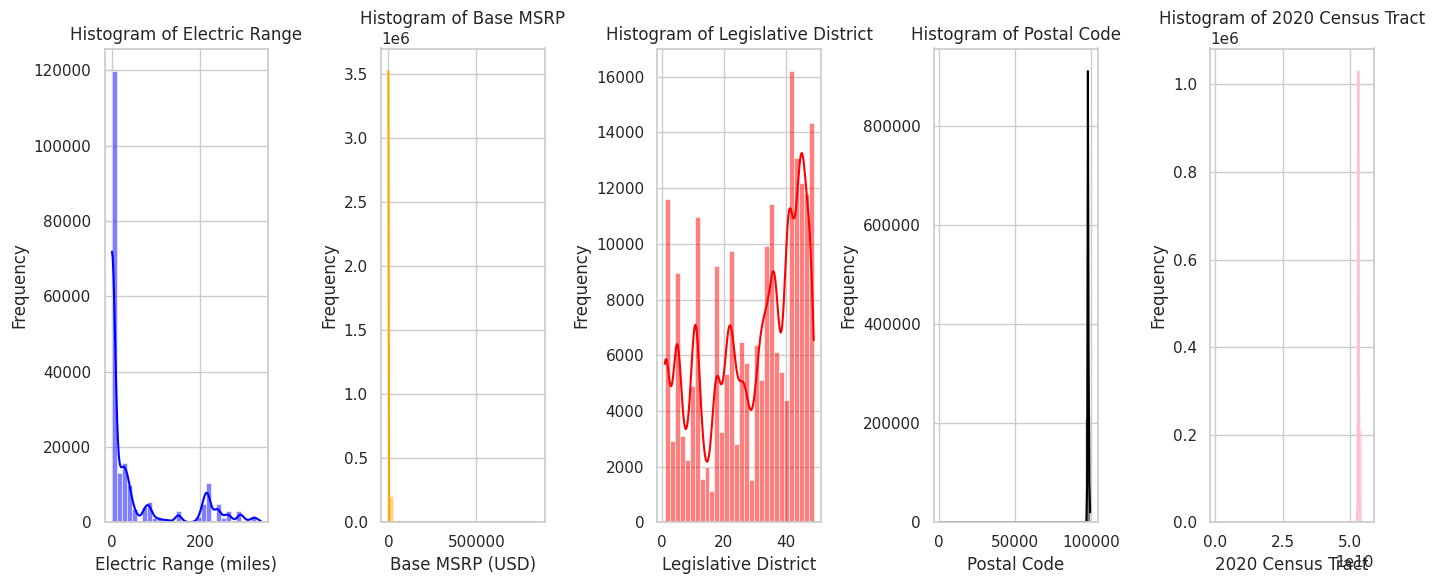

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(14, 6))

plt.subplot(1, 5, 1)
sns.histplot(dataSet['Electric Range'], bins=30, kde=True, color='blue')
plt.title('Histogram of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')

plt.subplot(1, 5, 2)
sns.histplot(dataSet['Base MSRP'], bins=30, kde=True, color='orange')
plt.title('Histogram of Base MSRP')
plt.xlabel('Base MSRP (USD)')
plt.ylabel('Frequency')

plt.subplot(1, 5, 3)
sns.histplot(dataSet['Legislative District'], bins=30, kde=True, color='red')
plt.title('Histogram of Legislative District')
plt.xlabel('Legislative District')
plt.ylabel('Frequency')

plt.subplot(1, 5, 4)
sns.histplot(dataSet['Postal Code'], bins=30, kde=True, color='black')
plt.title('Histogram of Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Frequency')

plt.subplot(1, 5, 5)
sns.histplot(dataSet['2020 Census Tract'], bins=30, kde=True, color='pink')
plt.title('Histogram of 2020 Census Tract')
plt.xlabel('2020 Census Tract')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


For imputing missing values in numerical columns (Electric Range, Base MSRP, Postal Code, Legislative District, 2020 Census Tract), we can choose between using the mean or median based on the data distribution. From the histograms:
* **Electric Range**: Highly skewed to the right, suggesting that median imputation is more appropriate.
* **Base MSRP**: Heavily right-skewed, which also supports using median imputation.

For **Postal Code** and **2020 Census Tract**, it's challenging to determine the appropriate imputation method visually. Since both are numerical columns, further analysis, such as calculating skewness, will be required to decide whether to use the mean or median for imputation.

We aim to decide between the mean and median based on the skewness of each column. If a column is highly skewed (typically, a skewness value greater than 1), the median is more appropriate to avoid distortions caused by extreme values. Conversely, for less skewed data, the mean provides a more balanced imputation.

In [ ]:
dataSet_Imputated = dataSet.copy()
for column in ['Electric Range', 'Base MSRP' , 'Legislative District' ,'Postal Code','2020 Census Tract']:
    if dataSet_Imputated[column].skew() > 1:
        dataSet_Imputated[column] = dataSet_Imputated[column].fillna(dataSet_Imputated[column].median())
    else:
        dataSet_Imputated[column] = dataSet_Imputated[column].fillna(dataSet_Imputated[column].mean())


We aim to decide between the mean and median based on the skewness of each column. If a column is highly skewed (typically, a skewness value greater than 1), the median is more appropriate to avoid distortions caused by extreme values. Conversely, for less skewed data, the mean provides a more balanced imputation.

---

##### **For Categorical Columns (County, City, Vehicle Location, Electric Utility)**

For categorical columns, missing values are often imputed using the mode, which is the most frequent value in the column. This is because the mode represents the most common category and can serve as a reasonable estimate for missing entries.

In [ ]:
for column in ['County', 'City', 'Vehicle Location','Electric Utility']:
    mode_value = dataSet_Imputated[column].mode()[0]
    dataSet_Imputated[column] = dataSet_Imputated[column].fillna(mode_value)

After handling the missing values, numerical columns were imputed using the median or mean based on their skewness, while categorical columns were imputed using the mode. Alternatively, since the number of missing values is relatively low, they could also be dropped without significantly affecting the dataset. Now, let's recheck the numerical columns to ensure the imputation was successful.

In [ ]:
dataSet_Imputated.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

---
---

# **Step 4: Feature Engineering**

### **Feature Encoding**

Feature Encoding refers to the process of converting categorical variables (text-based) into a format that can be used in machine learning models. Since most algorithms require numerical input, categorical data must be transformed appropriately. There are several methods to encode categorical features like **One-Hot Encoding**, **Label Encoding**, **Target Encoding**, **Frequency Encoding**.

Instead of creating multiple columns for each category,(unlike one-hot encoding) we will be using Label Encoding.

**Why Label Encoding?**
* **Efficient with Many Categories**: Since label encoding represents each category with a single integer, it’s space-efficient, especially when you have many unique categories.
* **Simplicity**: It’s straightforward to implement and doesn’t increase the feature space, unlike one-hot encoding, which can add many columns for a feature with numerous categories.
* **Suitable for Non-Ordinal Data**: Although label encoding can introduce a sense of order (because it uses integers).

**Features for Label Encoding:**
* **County**: Categorical feature representing the county name. This does not have a natural order.
* **City**: Categorical feature representing the city name. Like County, this is nominal data.
* **State**: Categorical feature representing the state name. It has a limited set of values, and still nominal.
* **Make**: Categorical feature representing the vehicle manufacturer. This is nominal.
* **Model**: Categorical feature representing the vehicle model. This is nominal data.
* **Electric Vehicle Type**: Categorical feature describing the type of electric vehicle. This is nominal.
* **Clean Alternative Fuel Vehicle (CAFV) Eligibility**: Categorical feature indicating eligibility status. This is nominal.

**Features That Do Not Need Label Encoding:**

* **VIN (1-10)**: Vehicle Identification Number. Unique and doesn't need encoding.
* **Postal Code**: This is numerical and does not need encoding.
* **Model Year**: This is numerical and does not need encoding.
* **Base MSRP**: This is numerical and does not need encoding.
* **Electric Range**: This is numerical and does not need encoding.
* **Legislative District**: This is numerical and does not need encoding.
* **DOL Vehicle ID**: This is numerical and aslo a unique identifier so it does not need encoding.
* **2020 Census Tract**: This is numerical and does not need encoding.

In [ ]:
label_encoder = LabelEncoder()
features_to_encode = ['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']
label_encodings = {}
for column in features_to_encode:
    dataSet_Imputated[column] = label_encoder.fit_transform(dataSet_Imputated[column])
    label_encodings[column] = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))



The dictionary (label_encodings) will be used to decode these features in future analyses, making the results easier for everyone to understand.

**For Vehicle Location Feature**:

The **Vehicle Location** column in our dataset contains geographic coordinates, represented in the form of "POINT (longitude latitude)". This feature gives the exact geographical location of each electric vehicle (EV), which can be valuable for spatial analysis and understanding regional distribution patterns of EVs.

**What is the Feature?**
* The Vehicle Location feature is stored as geographic coordinates in the WKT (Well-Known Text) format, where the location is given as a pair of longitude and latitude values.
* Example: POINT (-122.8728334 47.5798304)
 * -122.8728334: Longitude (East/West)
 * 47.5798304: Latitude (North/South)

 **Why is it Important?**
 * **Spatial Analysis**: This feature allows us to perform spatial distribution analysis, enabling us to visualize where the EVs are located on a map. For example, we can assess which regions have higher concentrations of EVs and how they are distributed across various cities and counties.
* **Clustering or Proximity**: Geographic coordinates can be used for calculating distances between vehicles or clustering them based on their locations, which may reveal regional trends in EV adoption or access to infrastructure.

In [ ]:
dataSet_Imputated['Latitude'] = dataSet_Imputated['Vehicle Location'].apply(lambda x: float(x.split(' ')[2].strip('()')))
dataSet_Imputated['Longitude'] = dataSet_Imputated['Vehicle Location'].apply(lambda x: float(x.split(' ')[1].strip('()')))

dataSet_Imputated = dataSet_Imputated.drop('Vehicle Location', axis=1)
dataSet_Imputated.head()

VIN (1-10)  County  City  State  Postal Code  Model Year  Make  Model  \
0  5UXTA6C0XM      87   595     44      98380.0        2021     5    147   
1  5YJ3E1EB1J      87   524     44      98370.0        2018    36     88   
2  WP0AD2A73G     169    61     44      98012.0        2016    30    100   
3  5YJ3E1EB5J      87    64     44      98310.0        2018    36     88   
4  1N4AZ1CP3K      85   546     44      98052.0        2019    28     86   

   Electric Vehicle Type  Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
0                      1                                                  0   
1                      0                                                  0   
2                      1                                                  2   
3                      0                                                  0   
4                      0                                                  0   

   Electric Range  Base MSRP  Legislative District  DOL Vehicle ID  \
0            30.0        0.0                  35.0       267929112   
1           215.0        0.0                  23.0       475911439   
2            15.0        0.0                   1.0       101971278   
3           215.0        0.0                  23.0       474363746   
4           150.0        0.0                  45.0       476346482   

                                Electric Utility  2020 Census Tract  \
0                         PUGET SOUND ENERGY INC       5.303509e+10   
1                         PUGET SOUND ENERGY INC       5.303509e+10   
2                         PUGET SOUND ENERGY INC       5.306105e+10   
3                         PUGET SOUND ENERGY INC       5.303508e+10   
4  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10   

    Latitude   Longitude  
0  47.579830 -122.872833  
1  47.746955 -122.636888  
2  47.839957 -122.206146  
3  47.593087 -122.623189  
4  47.678580 -122.131580

**What Did We Do?**
Extract Latitude and Longitude: The original Vehicle Location feature is not directly usable in most data analysis or machine learning tasks because it’s stored as a single text string (e.g., "POINT (longitude latitude)"). Therefore, we need to split this string into two separate numeric features: longitude and latitude. We split the string into longitude (extracted first) and latitude (extracted second). This creates two new numeric columns: Longitude and Latitude, making the data more usable for visualizations and future calculations.

**Why Split into Latitude and Longitude?**
* **Mapping**: For visualizing the distribution of EVs on a map, we need these two numeric features.
* **Distance Calculations**: In some cases, it might be useful to calculate distances between vehicle locations or between a vehicle and a reference point (e.g., a city center or Universities ..etc).

---

### **Normalization**

Normalization ensures that numerical features have similar scales, which is important for models like k-nearest neighbors, gradient descent-based algorithms, or neural networks that are sensitive to feature scales.
Two common normalization techniques are: Min-Max Scaling and Standardization (Z-score normalization).

We will be using Min-Max Scaler, which is a common technique used to normalize data by transforming the features to a specific range, typically between 0 and 1.

**Why MinMaxScaler?**
* **Normalization of Feature Values**:
 * **MinMaxScaler** adjusts the range of feature values to a specific interval, usually [0, 1]. This ensures that all features have the same scale, which is particularly useful when features have different units or vastly different ranges (e.g., prices in thousands, distances in meters).
 * The formula for MinMax scaling is:

       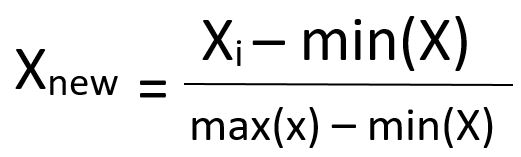
* **Benefits in Machine Learning Algorithms**: MinMaxScaler enhances the performance of distance-based algorithms by ensuring that features are on a similar scale. In K-Nearest Neighbors (KNN), it prevents distortion in distance calculations that can occur when features have different scales. For Support Vector Machines (SVM), which are sensitive to the magnitude of feature values, scaling helps maintain balance among features. Additionally, in algorithms that utilize gradient descent, such as neural networks or linear regression, MinMaxScaler facilitates faster convergence by avoiding the dominance of larger feature values over smaller ones.

* **Maintains Data Relationships**: Unlike standardization, which shifts the data to have a mean of 0 and a standard deviation of 1, MinMaxScaler preserves the relationship between the original values of the feature. This is important when the actual magnitude of features is meaningful and you just want to normalize their scales.
* **Prevents Dominance by High-Range Features**: Without scaling, features with larger ranges can dominate models. For instance, in our dataset, the Base MSRP (price) can have a much larger range compared to the Electric Range (distance), causing the model(Future work) to give more weight to the feature with higher numerical values. MinMaxScaler balances this out.

* **MinMaxScaler** works well even if the features have a skewed or non-normal distribution, making it suitable for a wide range of features, whether they have normal, uniform, or skewed distributions.

**Features to Normalize**:
* **Base MSRP**.
* **Electric Range**.
* **Model Year**.
* **Legislative District**.
* **2020 Census Tract**.


**Features That Should NOT Be Normalized**:

* **VIN (1-10)**: This is a unique identifier and does not need normalization.
* **Postal Code**: Although this is a numerical feature, it represents a location and typically does not benefit from scaling
* **DOL Vehicle ID**: Another unique identifier that does not need scaling.
* **Latitude and Longitude**
* Categorical Features (e.g., Make, Model, County, City).

In [ ]:
scaler = MinMaxScaler()
numeric_columns = ['Base MSRP','Electric Range','Legislative District', 'Model Year', '2020 Census Tract']

dataSet_Imputated[numeric_columns] = scaler.fit_transform(dataSet_Imputated[numeric_columns])


---
---

# **Step 5: Exploratory Data Analysis (EDA)**

Since the dataset is now cleaned, we will be using **dataSet_Cleaned**.

In [ ]:
dataSet_Cleaned=dataSet_Imputated.copy()

### **Descriptive Statistics**

In [ ]:
dataSet_Cleaned.describe()

County           City          State    Postal Code  \
count  210165.000000  210165.000000  210165.000000  210165.000000   
mean      105.424143     417.541398      43.950820   98178.209406   
std        45.053797     225.313050       1.260954    2445.406130   
min         0.000000       0.000000       0.000000    1731.000000   
25%        85.000000     215.000000      44.000000   98052.000000   
50%        85.000000     478.000000      44.000000   98125.000000   
75%       135.000000     598.000000      44.000000   98374.000000   
max       202.000000     757.000000      46.000000   99577.000000   

          Model Year           Make          Model  Electric Vehicle Type  \
count  210165.000000  210165.000000  210165.000000          210165.000000   
mean        0.848025      27.020394      86.142840               0.212267   
std         0.114959      12.037745      30.529598               0.408914   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.769231      16.000000      86.000000               0.000000   
50%         0.884615      36.000000      89.000000               0.000000   
75%         0.923077      36.000000      92.000000               0.000000   
max         1.000000      42.000000     152.000000               1.000000   

       Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
count                                      210165.000000   210165.000000   
mean                                            0.768948        0.150151   
std                                             0.618095        0.258079   
min                                             0.000000        0.000000   
25%                                             0.000000        0.000000   
50%                                             1.000000        0.000000   
75%                                             1.000000        0.124629   
max                                             2.000000        1.000000   

           Base MSRP  Legislative District  DOL Vehicle ID  2020 Census Tract  \
count  210165.000000         210165.000000    2.101650e+05      210165.000000   
mean        0.001062              0.581874    2.290774e+08           0.944716   
std         0.009057              0.310263    7.115519e+07           0.028198   
min         0.000000              0.000000    4.469000e+03           0.000000   
25%         0.000000              0.333333    1.948816e+08           0.945693   
50%         0.000000              0.645833    2.405164e+08           0.945693   
75%         0.000000              0.854167    2.629758e+08           0.946057   
max         1.000000              1.000000    4.792548e+08           1.000000   

            Latitude      Longitude  
count  210165.000000  210165.000000  
mean       47.437323    -122.017554  
std         0.812867       1.815633  
min        20.782500    -159.712613  
25%        47.355405    -122.395519  
50%        47.610010    -122.289500  
75%        47.726560    -122.136803  
max        61.318822     -70.743216

The table represents summary statistics for the numerical features of the dataset, including key metrics such as the total count of non-missing values, the mean (average), standard deviation (a measure of data variability), and the minimum and maximum values. It also provides percentile values (25th, 50th, and 75th).

---
For additional statistics, we will focus only on numeric values, excluding features that contain non-numeric characters.

In [ ]:
numeric_data = dataSet_Cleaned.select_dtypes(include=['float64', 'int64'])


To calculate the **Variance**, we will use **var()** method:

In [ ]:
numeric_data.var()

County                                               2.029845e+03
City                                                 5.076597e+04
State                                                1.590004e+00
Postal Code                                          5.980011e+06
Model Year                                           1.321563e-02
Make                                                 1.449073e+02
Model                                                9.320563e+02
Electric Vehicle Type                                1.672103e-01
Clean Alternative Fuel Vehicle (CAFV) Eligibility    3.820414e-01
Electric Range                                       6.660462e-02
Base MSRP                                            8.203640e-05
Legislative District                                 9.626283e-02
DOL Vehicle ID                                       5.063060e+15
2020 Census Tract                                    7.951254e-04
Latitude                                             6.607524e-01
Longitude                                            3.296523e+00
dtype: float64

This output represents the variance values for each feature in our dataset. Variance measures how spread out the values in each column are from the mean. Higher variance means more variability, while lower variance indicates that the values are closer to the mean.

columns like **DOL Vehicle ID, Postal Code, and City** show high variability, while columns like **State, Model Year, and geographic coordinates (Latitude, Longitude)** show low variance, indicating the data is concentrated around similar values in these features.

---






To calculate the **Standard Deviation**, we will use the method .std():

In [ ]:
numeric_data.std()

County                                               4.505380e+01
City                                                 2.253131e+02
State                                                1.260954e+00
Postal Code                                          2.445406e+03
Model Year                                           1.149593e-01
Make                                                 1.203774e+01
Model                                                3.052960e+01
Electric Vehicle Type                                4.089135e-01
Clean Alternative Fuel Vehicle (CAFV) Eligibility    6.180950e-01
Electric Range                                       2.580787e-01
Base MSRP                                            9.057395e-03
Legislative District                                 3.102625e-01
DOL Vehicle ID                                       7.115519e+07
2020 Census Tract                                    2.819797e-02
Latitude                                             8.128668e-01
Longitude                                            1.815633e+00
dtype: float64

The **standard deviation** values provide insights into the variability of the data for each feature in your dataset. Standard deviation measures the spread of the data points around the mean:
* A low standard deviation indicates that the data points are clustered closely around the mean.
* A high standard deviation signifies that the data points are spread out over a wider range of values.

The standard deviation results reveal the variability characteristics of various features in the dataset. For the County feature, a standard deviation of 45.05 suggests considerable variability among counties, indicating that the distribution of vehicles is quite diverse across different counties. In terms of City, a standard deviation of 225.31 shows significant variability in vehicle distribution, reflecting that some cities have many more vehicles than others. The State feature, with a standard deviation of 1.26, indicates relatively consistent vehicle distribution across states, with most states having a similar number of vehicles. Conversely, the Postal Code feature exhibits a high standard deviation of 2,445.41, revealing extreme variability in vehicle counts by postal code, suggesting that certain postal codes have significantly more vehicles than others. The Model Year feature shows minimal variability with a standard deviation of 0.11, implying a relatively uniform distribution of vehicle ages. For the Make feature, the standard deviation of 12.04 indicates that certain manufacturers dominate the market, resulting in varied vehicle counts for different makes. The Model feature has a standard deviation of 30.53, indicating substantial variability in the number of vehicles by model, with some models being much more prevalent than others. In terms of Electric Vehicle Type, a standard deviation of 0.41 reflects moderate variability among different types of electric vehicles, suggesting a balanced distribution. The Clean Alternative Fuel Vehicle (CAFV) Eligibility feature has a standard deviation of 0.62, indicating variability in the eligibility status of vehicles, suggesting that many vehicles meet the criteria but with some exceptions. The Electric Range shows moderate variability as well, with a standard deviation of 0.26, implying that while most vehicles have similar ranges, some differ significantly. The Base MSRP feature has a low standard deviation of 0.009, suggesting that vehicle prices are relatively consistent, with few models exhibiting significantly higher or lower prices. For the Legislative District, the standard deviation of 0.31 indicates some variability in vehicle counts, suggesting that while most districts have a similar number of vehicles, some may have more. The DOL Vehicle ID has a very high standard deviation of 71,155,190, which is expected for unique identifiers, reflecting the unique nature of each vehicle ID. The 2020 Census Tract shows a low standard deviation of 0.028, indicating low variability in vehicle distribution across tracts, suggesting relative uniformity. Lastly, both Latitude and Longitude features exhibit minimal variability, with standard deviations of 0.0204 and 0.0201, respectively, implying that vehicle distributions are fairly consistent across different latitudes and longitudes.

---
To Calculate **Skewness**, we will use .skew() method:

In [ ]:
numeric_data.skew()

County                                                0.450727
City                                                 -0.464614
State                                               -27.579278
Postal Code                                         -29.820272
Model Year                                           -1.231478
Make                                                 -0.754395
Model                                                -0.468043
Electric Vehicle Type                                 1.407321
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0.195210
Electric Range                                        1.698137
Base MSRP                                            14.692056
Legislative District                                 -0.434715
DOL Vehicle ID                                        0.248472
2020 Census Tract                                   -27.540234
Latitude                                             -7.833312
Longitude                                            15.719513
dtype: float64

The **skewness** values provide insights into the distribution of the data for each feature in your dataset. **Skewness** measures the asymmetry of the distribution:
* A skewness value close to 0 indicates a symmetrical distribution.
* A positive skew (greater than 0) indicates that the tail on the right side of the distribution is longer or fatter (more values on the higher end).
* A negative skew (less than 0) indicates that the tail on the left side is longer or fatter (more values on the lower end).

The skewness results reveal the distribution characteristics of various features in the dataset. For example, the **County** feature has a skewness of 0.45, indicating a slight positive skew, meaning more counties have lower values, but some exhibit higher values. The **City** feature shows a skewness of -0.46, reflecting a negative skew where cities tend to cluster at higher values, with a few lower-value outliers. The **State** feature has a highly negative skew of -27.58, suggesting most data points are concentrated around a few states, with a long tail toward those with fewer vehicles. The **Postal Code** feature exhibits an even more extreme negative skew of -29.82, indicating that most postal codes are linked to higher frequencies, with only a few low-frequency codes. Similarly, the **Model Year** feature shows a negative skew of -1.23, indicating newer models are more common. The **Make** feature has a skewness of -0.75, suggesting dominance by certain manufacturers, while the **Model** feature is slightly negatively skewed at -0.47, with more popular models being frequent. In contrast, **Electric Vehicle Type** (1.41) and **Electric Range** (1.70) show positive skewness, indicating that certain types and higher ranges are less common. The **Base MSRP** is highly positively skewed at 14.69, suggesting most vehicles are priced lower, with a few high-priced models affecting the average. The **Legislative District** shows a slight negative skew of -0.43, with most districts well represented. The **DOL Vehicle ID** is slightly positively skewed at 0.25, typical for unique identifiers. Finally, both the **2020 Census Tract** (-27.54) and **Latitude** (15.72) display high skewness, indicating concentrations around certain values, while **Longitude** (-7.83) shows a negative skew, indicating vehicles are more concentrated within certain longitudes.

---
To calculate the **Kurtosis**, we will be using the kurt() method:

In [ ]:
numeric_data.kurt()

County                                                -0.678178
City                                                  -1.170568
State                                                786.153043
Postal Code                                          936.243741
Model Year                                             0.860024
Make                                                  -1.006183
Model                                                  0.883170
Electric Vehicle Type                                 -0.019449
Clean Alternative Fuel Vehicle (CAFV) Eligibility     -0.582751
Electric Range                                         1.442981
Base MSRP                                            785.556296
Legislative District                                  -1.119931
DOL Vehicle ID                                         3.719563
2020 Census Tract                                    783.451570
Latitude                                             140.461048
Longitude                                            369.977055
dtype: float64

The **kurtosis** values provide insights into the "tailedness" of the data distribution for each feature in your dataset. **Kurtosis** measures the sharpness of the peak and the heaviness of the tails in the distribution:
* A kurtosis value close to 0 indicates a normal distribution.
* Positive kurtosis (greater than 0) suggests a distribution that has heavier tails and a sharper peak than a normal distribution (more outliers).
* Negative kurtosis (less than 0) indicates a distribution with lighter tails and a flatter peak than a normal distribution (fewer outliers).

The kurtosis results reveal various distribution characteristics across the dataset features. For instance, the **County** feature has a kurtosis of -0.68, indicating a distribution that is relatively flat with fewer outliers compared to a normal distribution. The **City** feature has a kurtosis of -1.17, suggesting an even flatter distribution, which also reflects fewer extreme values. Conversely, the **State** feature exhibits a highly positive kurtosis of 786.15, indicating a distribution with a sharp peak and heavy tails, suggesting a significant presence of outliers concentrated around a few states. The **Postal Code** feature also shows a high positive kurtosis of 936.24, reflecting a similar trend of a peaked distribution with many outliers. The **Model Year** feature has a kurtosis of 0.86, indicating a slightly sharper peak than normal, suggesting more frequent occurrences of certain model years. The **Make** feature shows a kurtosis of -1.01, implying a flatter distribution with fewer extreme values. The **Model** feature, with a kurtosis of 0.88, suggests a slight tendency toward a sharper peak. The Electric Vehicle Type has a kurtosis of -0.02, indicating a distribution that is nearly normal. The **Clean Alternative Fuel Vehicle (CAFV) Eligibility** feature shows a kurtosis of -0.58, also suggesting fewer outliers. The **Electric Range** has a kurtosis of 1.44, indicating a sharper peak and heavier tails, which could imply a greater presence of outliers in this category. The **Base MSRP** displays a kurtosis of 785.56, indicating a high peak and heavy tails, suggesting significant outlier presence among vehicle prices. The **Legislative District** feature has a kurtosis of -1.12, indicating a flatter distribution. The **DOL Vehicle ID**, with a kurtosis of 3.72, suggests a distribution with a sharper peak and significant outliers. Finally, both the **2020 Census Tract** (783.45) and **Latitude** (369.98) exhibit high kurtosis values, indicating sharp peaks and heavy tails, while **Longitude** (140.46) shows a positive kurtosis, indicating the presence of outliers in this feature as well.

---
To calculate the **correlation**, we will use corr() method:

In [ ]:
numeric_data.corr()

County      City  \
County                                             1.000000 -0.177587   
City                                              -0.177587  1.000000   
State                                              0.000102  0.006759   
Postal Code                                        0.015912  0.035421   
Model Year                                        -0.014730 -0.003945   
Make                                              -0.017584 -0.045286   
Model                                             -0.010991 -0.000854   
Electric Vehicle Type                             -0.000240  0.046908   
Clean Alternative Fuel Vehicle (CAFV) Eligibility  0.002676 -0.002150   
Electric Range                                    -0.005817 -0.000368   
Base MSRP                                         -0.002672 -0.007684   
Legislative District                              -0.113832  0.010336   
DOL Vehicle ID                                    -0.004568  0.003116   
2020 Census Tract                                  0.010711  0.005457   
Latitude                                           0.349663 -0.165322   
Longitude                                          0.062306  0.042338   

                                                          State  Postal Code  \
County                                             1.015062e-04     0.015912   
City                                               6.759185e-03     0.035421   
State                                              1.000000e+00     0.499047   
Postal Code                                        4.990471e-01     1.000000   
Model Year                                         5.177336e-03    -0.001291   
Make                                              -3.036347e-03    -0.010501   
Model                                             -4.376781e-03    -0.006000   
Electric Vehicle Type                             -5.333946e-03     0.004126   
Clean Alternative Fuel Vehicle (CAFV) Eligibility -1.936216e-03     0.002845   
Electric Range                                    -2.632589e-04    -0.000800   
Base MSRP                                         -9.503267e-04    -0.003407   
Legislative District                               3.876647e-14    -0.051844   
DOL Vehicle ID                                     2.899720e-03     0.005862   
2020 Census Tract                                  9.907613e-01     0.508744   
Latitude                                           5.269876e-01     0.385764   
Longitude                                         -4.041186e-01    -0.751845   

                                                   Model Year      Make  \
County                                              -0.014730 -0.017584   
City                                                -0.003945 -0.045286   
State                                                0.005177 -0.003036   
Postal Code                                         -0.001291 -0.010501   
Model Year                                           1.000000  0.101856   
Make                                                 0.101856  1.000000   
Model                                                0.040776  0.224797   
Electric Vehicle Type                               -0.158026 -0.357344   
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.368673  0.012852   
Electric Range                                      -0.513540  0.050306   
Base MSRP                                           -0.230651  0.018411   
Legislative District                                -0.016808  0.045476   
DOL Vehicle ID                                       0.215703  0.002201   
2020 Census Tract                                    0.004709 -0.003478   
Latitude                                            -0.001390  0.010223   
Longitude                                           -0.002440 -0.004358   

                                                      Model  \
County                                            -0.010991   
City                                            

The **correlation** matrix provides insights into the relationships between different features in the dataset. **Correlation** measures the strength and direction of a linear relationship between two variables, with values ranging from -1 to 1:
* A correlation value close to 1 indicates a strong positive relationship, meaning that as one variable increases, the other tends to increase as well.
* A correlation value close to -1 indicates a strong negative relationship, meaning that as one variable increases, the other tends to decrease.
* A correlation value close to 0 suggests little to no linear relationship between the variables.

Examining the correlation results reveals various relationships among the features. For example, the **County** feature has a weak negative correlation of -0.18 with **City**, indicating a slight inverse relationship. The **State** feature shows a strong positive correlation of 0.99 with the **2020 Census Tract**, suggesting that data points in these two features are closely related. The **Postal Code** feature has a moderate positive correlation of 0.50 with **State**, indicating a reasonable relationship between these two variables. In contrast, the **Model Year** feature has a weak negative correlation of -0.51 with **Electric Range**, suggesting that older models tend to have lower electric ranges. The **Make** feature exhibits a moderate positive correlation of 0.22 with **Model**, indicating that certain manufacturers have a tendency to produce specific models. The** Electric Vehicle Type** and **Clean Alternative Fuel Vehicle (CAFV) Eligibility** features show a moderate positive correlation of 0.16, suggesting a relationship between vehicle types and their eligibility. **Electric Range** is negatively correlated with **CAFV Eligibility** (-0.65), implying that as eligibility increases, the **electric range** tends to decrease. The **Base MSRP** has a weak negative correlation of -0.23 with **Model Year**, suggesting that older models are generally less expensive. **Legislative District** shows a very weak positive correlation with City (0.01), indicating almost no relationship. The **DOL Vehicle ID** has a negligible correlation with other features, which is expected due to its nature as a unique identifier. **Latitude** and **Longitude** exhibit moderate correlations with other geographic features, particularly with **Longitude** showing a moderate positive correlation of 0.54 with State, suggesting a geographic pattern in vehicle distribution.

---
---

### **Spatial Distribution**

We utilized the **Folium** library, a powerful tool for creating interactive maps with Python. **Folium** provides a simple way to visualize geographic data, enabling us to plot points, draw shapes, and generate map-based visualizations, which are especially useful for showing spatial relationships.

In [ ]:
## Do NOT run this. will cause an Error, explaination below;;
m = folium.Map(location=[dataSet_Cleaned['Latitude'].mean(), dataSet_Cleaned['Longitude'].mean()], zoom_start=6)

for idx, row in dataSet_Cleaned.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"Model: {row['Model']}<br>Year: {row['Model Year']}"
    ).add_to(m)

display(m)


 We leveraged **Folium** to plot the locations of electric vehicles (EVs) based on their latitude and longitude data. The approach involved creating a base map, centered on the mean coordinates of all EV entries to ensure an appropriate view of the data. We then iterated over the dataset, adding CircleMarker elements at each EV’s geographic coordinates. These markers were styled with a blue color and moderate opacity for better visibility. Additionally, each marker included a popup that displayed the EV’s model and year, providing quick and interactive access to relevant information.

Due to output size constraints, we sampled 1000 records from the dataset instead of plotting all points. This approach maintained map performance while still providing a comprehensive view of a sample of the data.

In [ ]:
sampled_data = dataSet_Cleaned.sample(1000, random_state=42)

m = folium.Map(location=[dataSet_Cleaned['Latitude'].mean(), dataSet_Cleaned['Longitude'].mean()], zoom_start=6)

for idx, row in sampled_data.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"Model: {row['Model']}<br>Year: {row['Model Year']}"
    ).add_to(m)

m


The output map generated using the Folium library offers an interactive visualization of the electric vehicle (EV) locations across different geographic areas. We can easily zoom in and out to explore specific regions in greater detail.

---

### **Model Popularity**

In [ ]:
yearly_model_counts = dataSet_Cleaned.groupby(['Model Year', 'Model']).size().reset_index(name='Count')

# Map back the original model names using label_encodings
yearly_model_counts['Model'] = yearly_model_counts['Model'].map(label_encodings['Model'])

# Revert the scaling for 'Model Year' using the MinMaxScaler
scaler = MinMaxScaler()
# This reverts the scaled Model Year back to its original range.
min_year = dataSet['Model Year'].min()
max_year = dataSet['Model Year'].max()
yearly_model_counts['Model Year'] = yearly_model_counts['Model Year'] * (max_year - min_year) + min_year

for index, row in yearly_model_counts.iterrows():
    print(f"Year: {int(row['Model Year'])}, Model: {row['Model']}, Count: {row['Count']}")


Year: 1999, Model: RANGER, Count: 2
Year: 2000, Model: RANGER, Count: 7
Year: 2002, Model: RAV4, Count: 2
Year: 2003, Model: RAV4, Count: 1
Year: 2008, Model: ROADSTER, Count: 22
Year: 2010, Model: ROADSTER, Count: 21
Year: 2010, Model: WHEEGO, Count: 3
Year: 2011, Model: CITY, Count: 5
Year: 2011, Model: LEAF, Count: 617
Year: 2011, Model: ROADSTER, Count: 6
Year: 2011, Model: TRANSIT CONNECT ELECTRIC, Count: 4
Year: 2011, Model: VOLT, Count: 72
Year: 2012, Model: FOCUS, Count: 10
Year: 2012, Model: I-MIEV, Count: 40
Year: 2012, Model: KARMA, Count: 13
Year: 2012, Model: LEAF, Count: 518
Year: 2012, Model: MODEL S, Count: 129
Year: 2012, Model: PRIUS PLUG-IN, Count: 376
Year: 2012, Model: RAV4, Count: 9
Year: 2012, Model: VOLT, Count: 454
Year: 2013, Model: 500, Count: 107
Year: 2013, Model: C-MAX, Count: 342
Year: 2013, Model: CR-V, Count: 6
Year: 2013, Model: FOCUS, Count: 65
Year: 2013, Model: FORTWO ELECTRIC DRIVE, Count: 23
Year: 2013, Model: FUSION, Count: 168
Year: 2013, Model:

#### **Frequency Trends**


Based On the results Above:

**Popular Models**
* **Top Models**: The top three models, Model Y (44,038), Model 3 (32,520), and LEAF(13,606), have significantly higher counts compared to others, indicating they are the most popular choices among EV buyers.
* **Fading Models**: Models like Volt, RAV4 PRIME, and F-150 show lower popularity, with counts in the lower thousands . This might suggest a decline in interest or availability.

**Growth in Electric Vehicle Adoption**
* **Diversity of Models**: There is a wide range of models available, indicating that manufacturers are expanding their electric vehicle offerings to cater to different consumer preferences.
* **Increasing Count**: The higher counts for models like Mustang Mach-E, ID.4, and IONIQ 5 suggest an upward trend in the popularity of newer electric models that have entered the market.

**Market Trends**
* **SUVs vs. Sedans**: The popularity of SUVs like the Model Y and Mustang Mach-E might indicate a consumer preference shift towards larger vehicles that offer more space and utility, reflecting broader automotive market trends.

* **Legacy Brands vs. New Entrants**: Traditional automakers (e.g., Nissan with LEAF, Chevrolet with Bolt EV) are being challenged by newer entrants (e.g., Tesla, Rivian with R1T and R1S) that may be appealing more to tech-savvy consumers and those looking for innovation.

* **Niche Models**: Models like Cybertruck, LYRIQ, and E-GOLF show lower counts, suggesting that while they might have niche appeal, they haven't reached mass-market status yet.

---


#### **Yearly Trends**
For the yearly trends in electric vehicle (EV) model popularity:

**(1999–2010)**
* **Low EV adoption**: Between 1999 and 2010, the market for electric vehicles was minimal. Only a few models, such as the RANGER and ROADSTER, had a presence, with low counts.
* **Rising Interest in EVs**: By 2010, there is a slight uptick with models like the LEAF and VOLTA showing early signs of growth.

**(2011–2014)**
* **Growth of Popular Models**: The LEAF starts gaining traction in 2011, with increasing numbers through 2014. The VOLTA also shows notable popularity during this time.
* **Diverse Offerings**: More models like the FOCUS, PRIUS PLUG-IN, and FUSION start appearing, showing manufacturers’ growing interest in EVs.

**(2015–2017)**
* **Mainstream Adoption**: EV adoption starts picking up significantly with models like the Model S, Model X, and LEAF reaching high production counts. By 2017, the Model 3 begins to rise.
* **Variety in Offerings**: The mid-2010s see the emergence of more luxury brands (e.g., Porsche Panamera and Mercedes-Benz S-Class) and mainstream brands (BMW i3, Chevrolet Bolt EV) in the EV market.

**(2018–2019)**
* **Rapid Growth**: Models like Model 3 and Model S dominate the market, with thousands of units by 2018–2019.
* **New Entrants**: Models such as the BOLT EV and LEAF continue their strong presence, while new models like the I-PACE, NIRO, and Outlander begin to show up, suggesting a diversification of consumer choices.

**(2020 onwards)**
* **Sustained Growth**: Popular models from Tesla (Model 3, Model X) maintain their position at the top of the EV market. Other brands are catching up, such as Nissan, Chevrolet, and new models like KONA and I-PACE making their presence known.

---


#### **Regional Trends**

In [ ]:
Regional_model_counts = dataSet_Cleaned.groupby(['State', 'Model']).size().reset_index(name='Count')

# map back the original model/state names using label_encodings dictionary
Regional_model_counts['Model'] = Regional_model_counts['Model'].map(label_encodings['Model'])
Regional_model_counts['State'] = Regional_model_counts['State'].map(label_encodings['State'])


for state, state_data in Regional_model_counts.groupby(['State']):
    print(f"State: {state}")
    for index, row in state_data.iterrows():
        print(f"  Model: {row['Model']}, Count: {row['Count']}")

State: ('AE',)
  Model: 530E, Count: 1
State: ('AK',)
  Model: MODEL Y, Count: 1
State: ('AL',)
  Model: BOLT EUV, Count: 1
  Model: BOLT EV, Count: 1
  Model: ID.4, Count: 1
  Model: MODEL 3, Count: 2
  Model: MODEL Y, Count: 2
  Model: PRIUS PRIME, Count: 1
  Model: RAV4 PRIME, Count: 1
State: ('AR',)
  Model: LEAF, Count: 1
  Model: MODEL 3, Count: 1
  Model: R1T, Count: 1
State: ('AZ',)
  Model: GLC-CLASS, Count: 1
  Model: LEAF, Count: 1
  Model: MODEL 3, Count: 1
  Model: MODEL S, Count: 1
  Model: MODEL X, Count: 1
  Model: MODEL Y, Count: 1
  Model: PACIFICA, Count: 1
  Model: R1S, Count: 1
  Model: XC40, Count: 1
State: ('BC',)
  Model: MODEL X, Count: 1
  Model: VOLT, Count: 1
State: ('CA',)
  Model: 330E, Count: 1
  Model: BOLT EUV, Count: 2
  Model: CLARITY, Count: 1
  Model: E-GOLF, Count: 1
  Model: E-TRON, Count: 1
  Model: F-150, Count: 2
  Model: FOCUS, Count: 1
  Model: FUSION, Count: 5
  Model: GV60, Count: 1
  Model: I4, Count: 1
  Model: ID.4, Count: 4
  Model: ION

**Regional trends** in electric vehicle (EV) adoption across various states in the United States:
* **California**: continues to lead in electric vehicle (EV) adoption, with a significant number of popular models such as the Model 3, Model S, and LEAF dominating the market. The state offers a diverse range of models from various manufacturers, reflecting its strong commitment to sustainability and clean energy initiatives.
* **Texas**: is showing increasing interest in electric vehicles, with models like the Model 3 and BOLT EV gaining traction among consumers. The introduction of new models and brands indicates a developing EV market in the state, appealing to a broader range of buyers.

* **New York**: experiences steady growth in EV popularity, particularly with models such as the LEAF and Model 3. State incentives and programs play a crucial role in encouraging residents to adopt electric vehicles, contributing to a gradual increase in the number of EVs on the road.

* **Florida**: with increasing sales of models like the Model Y and I-PACE. The presence of various models suggests that the EV market is expanding, catering to a diverse range of consumer needs.
* **Washington**: has a strong electric vehicle community, with the LEAF and Model 3 being particularly popular among residents. Supportive state policies for electric vehicles have led to sustained growth and interest in the EV market.

* **Illinois**: is developing a market for electric vehicles, with models like the BOLT EV and Model 3 gaining recognition. The state’s growing infrastructure for EV charging stations is expected to facilitate higher adoption rates in the coming years.

* **Massachusetts**: promotes sustainable practices, which have led to a rise in EV adoption, particularly with models such as the Model 3 and LEAF. State incentives are making electric vehicles more accessible to residents, resulting in gradual market growth.

* **New Jersey**: shows consistent demand for electric vehicles, with popular models like the Model 3 and LEAF frequently being purchased. The state's incentives for EV purchases are encouraging more residents to consider making the switch to electric.

* **Virginia**: with models such as the Model 3 and BOLT EV gaining popularity. Efforts to expand charging infrastructure are paving the way for higher adoption rates across the state.

* **Colorado**: displays growing interest in electric vehicles, with models like the Model 3 and I-PACE appearing more frequently on the roads. The state’s environmental initiatives support the adoption of electric vehicles, contributing to overall market growth.

* **Oregon**: has an established market for electric vehicles, with popular models like the LEAF and Model 3. Strong community support and initiatives for EVs help maintain steady growth in the state.

* **Maryland**: shows positive trends in EV adoption, particularly with models such as the LEAF and Model 3 gaining traction. Various state programs promoting clean energy are contributing to a gradual increase in electric vehicle sales.

* **Arizona**: is seeing an increase in EV adoption, particularly with models like the Model 3 and BOLT EV. The expanding market reflects a growing awareness of the benefits of electric vehicles among consumers.

* **Connecticut**: experiences stable growth in electric vehicle adoption, with models like the LEAF and Model 3 performing well. State incentives are encouraging residents to switch to electric vehicles, aiding in market expansion.
* **Pennsylvania**: is developing interest in electric vehicles, with increasing sales of models like the Model 3 and BOLT EV. Investment in charging infrastructure is expected to enhance EV adoption in the state.
* **Georgia**: is witnessing emerging trends in electric vehicle sales, particularly with the Model 3 and LEAF. State incentives and programs are positively impacting consumer interest and adoption rates.

* **Minnesota**: shows gradual adoption of electric vehicles, with models like the LEAF and BOLT EV becoming more popular. Community engagement initiatives are helping to promote awareness and usage of electric vehicles.

* **Michigan** is increasingly adopting electric vehicles, with models like the Model 3 and BOLT EV becoming more common. The influence of the automotive industry in the state is driving greater interest in EVs.

* **Ohio**: is showing growing interest in electric vehicles, with models like the LEAF and Model 3 gaining traction. State incentives are playing a significant role in encouraging residents to adopt electric vehicles.

* **North Carolina**: is experiencing rising popularity in electric vehicles, with models such as the Model 3 and LEAF leading the market. The growth of charging infrastructure is contributing to increased adoption rates in the state.

* **Tennessee**: is developing a market for electric vehicles, with increasing recognition of models like the Model 3 and BOLT EV. The potential for growth is supported by new charging stations and incentives for consumers.

---
---







































# **Step 6: Visualization**

In this step we will display multiple plots for each feature.

### **Histograms**
Histogram for Electric Range:

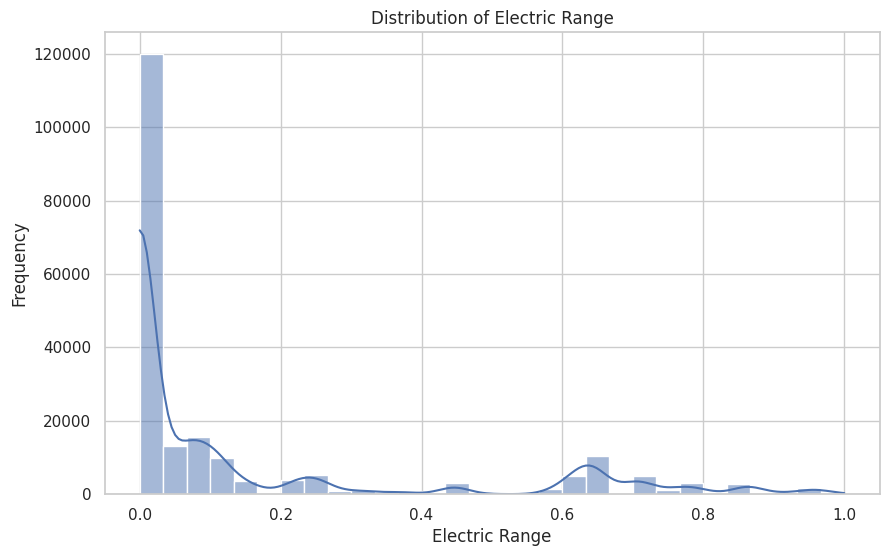

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dataSet_Cleaned['Electric Range'], bins=30, kde=True)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.show()


Histogram for Base MSRP:

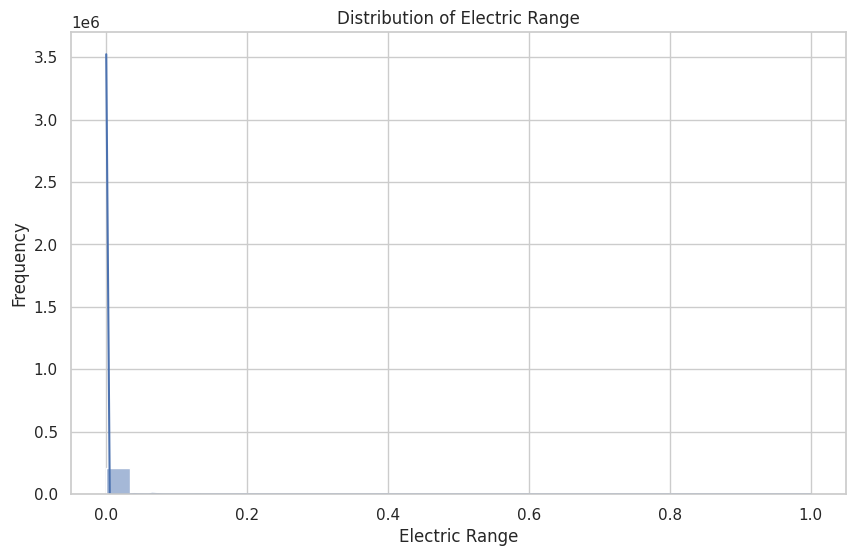

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dataSet_Cleaned['Base MSRP'], bins=30, kde=True)
plt.title('Distribution of Base MSRP')
plt.xlabel('Base MSRP')
plt.ylabel('Frequency')
plt.show()


Histogram for Postal Code:

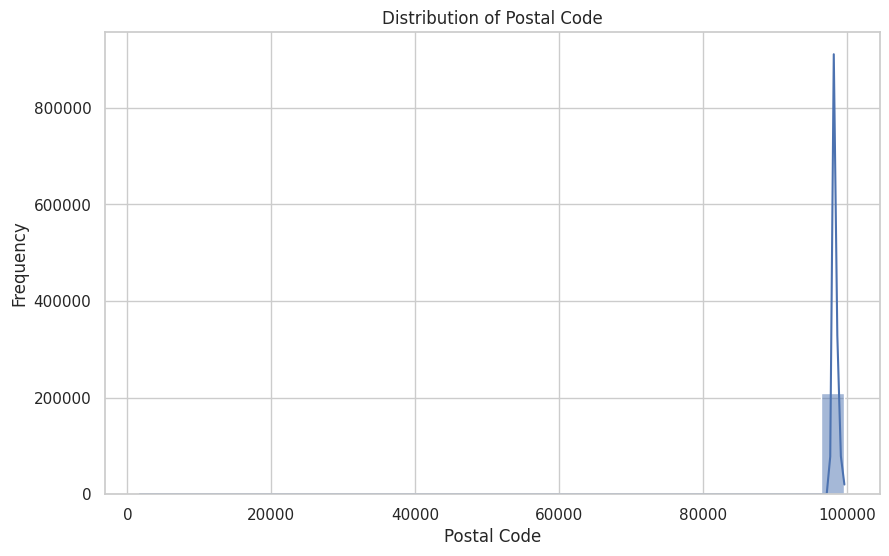

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dataSet_Cleaned['Postal Code'], bins=30, kde=True)
plt.title('Distribution of Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Frequency')
plt.show()


Histogram for 2020 Census Tract:

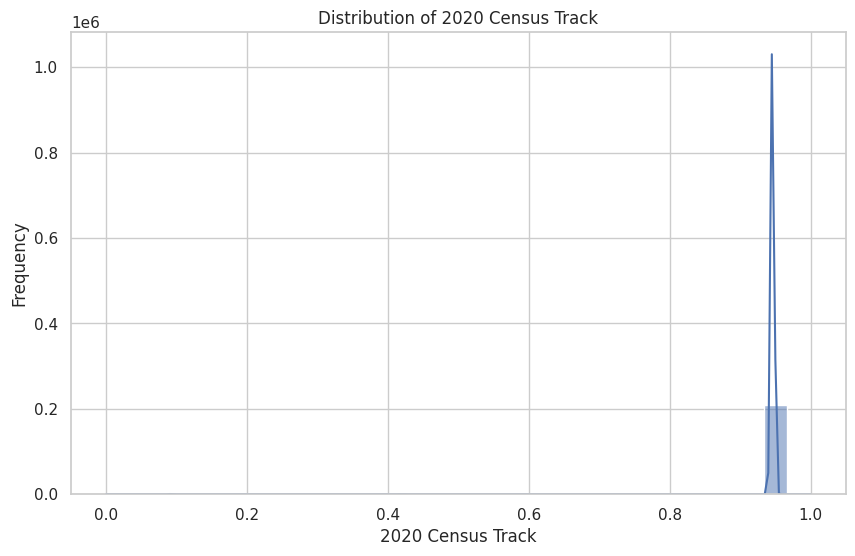

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dataSet_Cleaned['2020 Census Tract'], bins=30, kde=True)
plt.title('Distribution of 2020 Census Tract')
plt.xlabel('2020 Census Tract')
plt.ylabel('Frequency')
plt.show()


Histogram for Model Year:

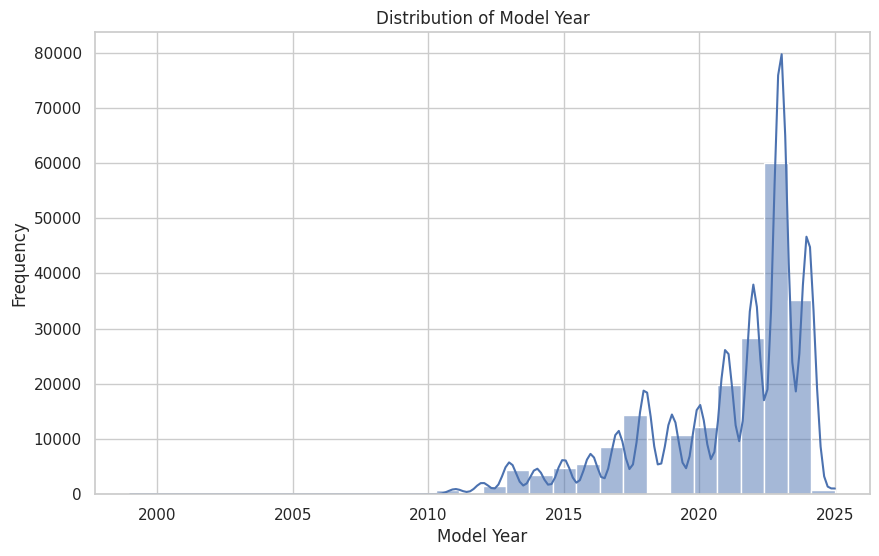

In [ ]:
plotingmodel = dataSet_Cleaned.copy()
scaler = MinMaxScaler()
min_year = dataSet['Model Year'].min()
max_year = dataSet['Model Year'].max()
plotingmodel['Model Year'] = plotingmodel['Model Year'] * (max_year - min_year) + min_year
## Scaling was reverting for a better understanding of the results.

plt.figure(figsize=(10, 6))
sns.histplot(plotingmodel['Model Year'], bins=30, kde=True) ## model year is normalized using MinMax Scaller.
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()


### **Scatter Plots**


Scatter Plot between Model Year Vs. Electric Range:

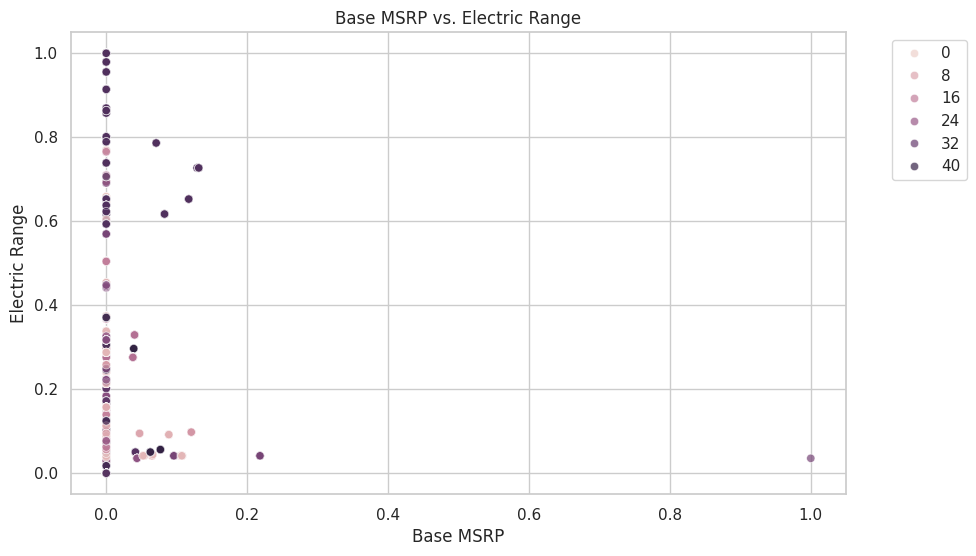

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataSet_Cleaned, x='Base MSRP', y='Electric Range', hue='Make', alpha=0.7)
plt.title('Base MSRP vs. Electric Range')
plt.xlabel('Base MSRP')
plt.ylabel('Electric Range')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Scatter Plot between Model Year Vs. Electric Range:

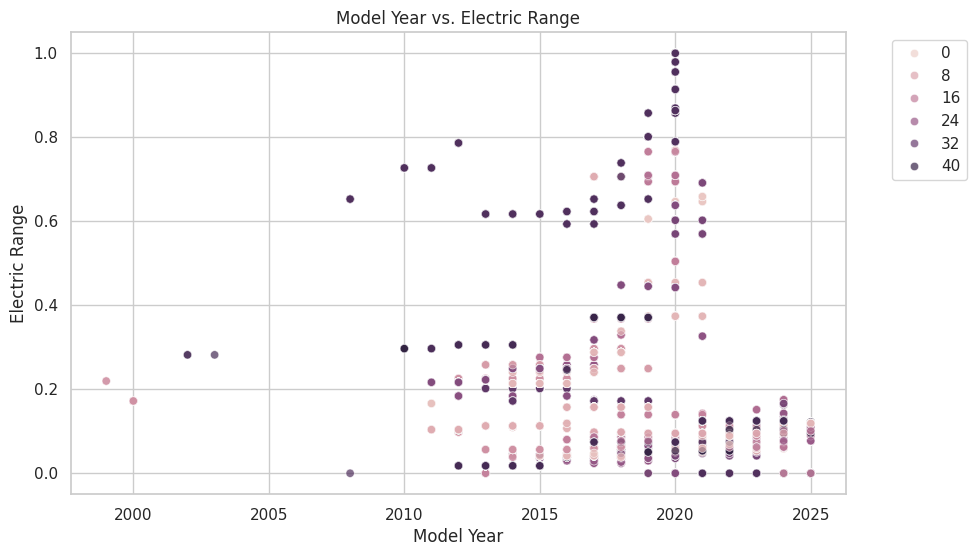

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plotingmodel, x='Model Year', y='Electric Range', hue='Make', alpha=0.7)
plt.title('Model Year vs. Electric Range')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Scatter Plot between Model Year Vs. Postal Code:

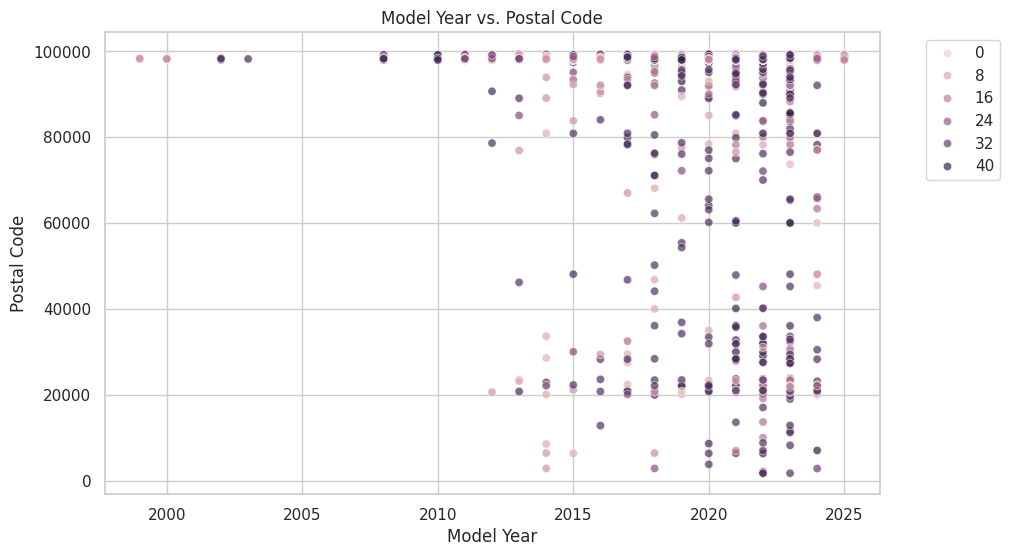

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plotingmodel, x='Model Year', y='Postal Code', hue='Make', alpha=0.7)
plt.title('Model Year vs. Postal Code')
plt.xlabel('Model Year')
plt.ylabel('Postal Code')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **Correlation Heatmap**

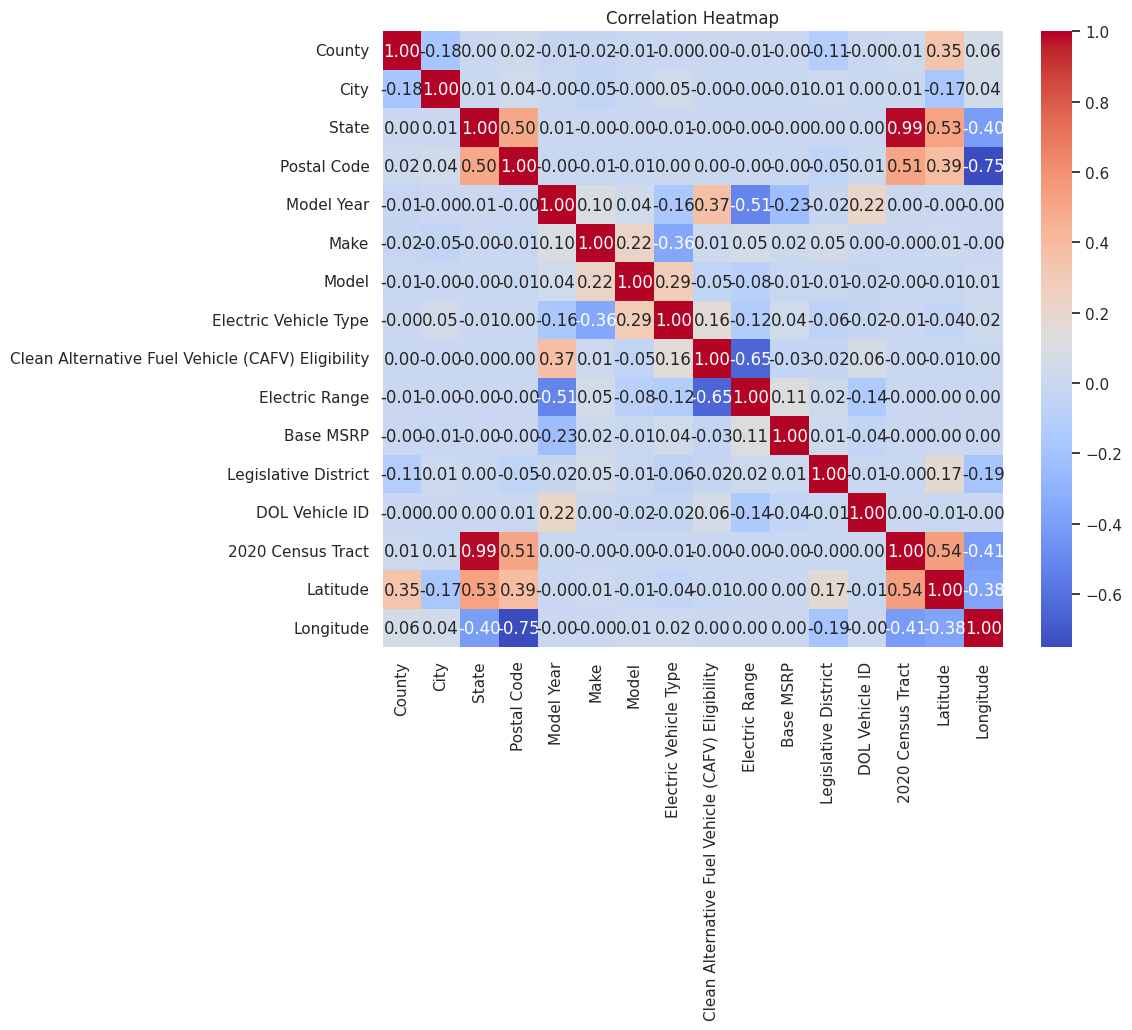

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **Folium Maps**

#### **Folium Heat Map for EV Distribution**

In [ ]:
heat_data = [[row['Latitude'], row['Longitude']] for index, row in dataSet_Cleaned.iterrows()]

m = folium.Map(location=[dataSet_Cleaned['Latitude'].mean(), dataSet_Cleaned['Longitude'].mean()], zoom_start=6)

HeatMap(heat_data, radius=15).add_to(m)

m


#### **Folium Interactive Markers**

In [ ]:
state_counts = dataSet_Cleaned['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# Create a base map
m = folium.Map(location=[dataSet_Cleaned['Latitude'].mean(), dataSet_Cleaned['Longitude'].mean()], zoom_start=5)

marker_cluster = MarkerCluster().add_to(m)

for idx, row in state_counts.iterrows():
    folium.CircleMarker(
        location=[dataSet_Cleaned[dataSet_Cleaned['State'] == row['State']]['Latitude'].mean(),
                  dataSet_Cleaned[dataSet_Cleaned['State'] == row['State']]['Longitude'].mean()],
        radius=row['Count'] / 50,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"State: {row['State']}<br>Count: {row['Count']}"
    ).add_to(marker_cluster)

m


### **Bar Charts**

#### **Bar Chart for EV Counts by City**

<ipython-input-134-99d9c08fdbec>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_counts, x='State', y='Count', palette='viridis')


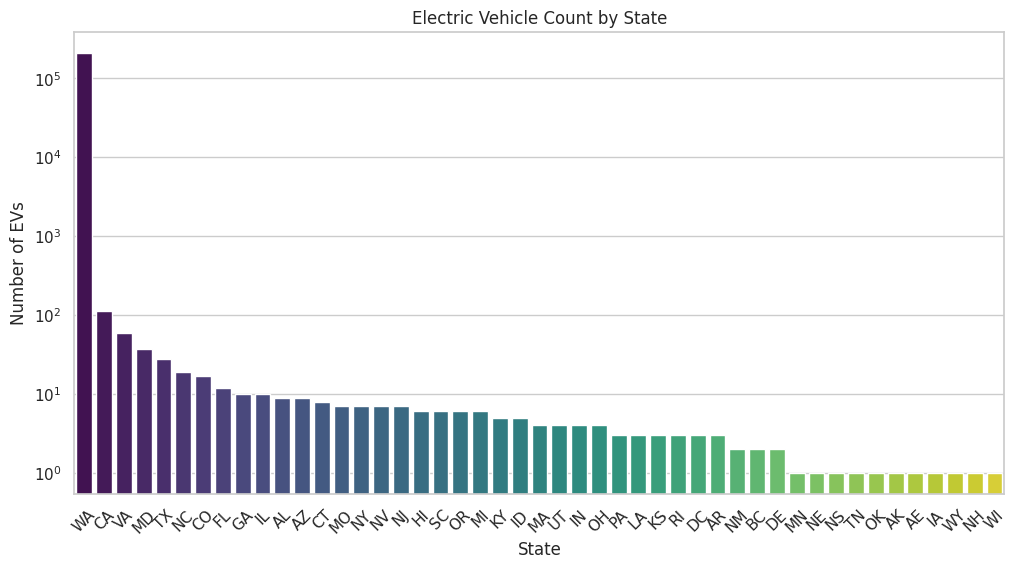

In [ ]:
state_counts = dataSet_Cleaned['State'].value_counts().reset_index()
state_counts.columns = ['Encoded State', 'Count']

state_counts['State'] = state_counts['Encoded State'].map(label_encodings['State'])

plt.figure(figsize=(12, 6))
sns.barplot(data=state_counts, x='State', y='Count', palette='viridis')
plt.title('Electric Vehicle Count by State')
plt.xlabel('State')
plt.ylabel('Number of EVs')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()


#### **Bar Chart for EV Counts by Model Year**

<ipython-input-143-86a96df194a1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tt, x='Model Year', y='Count', palette='viridis')


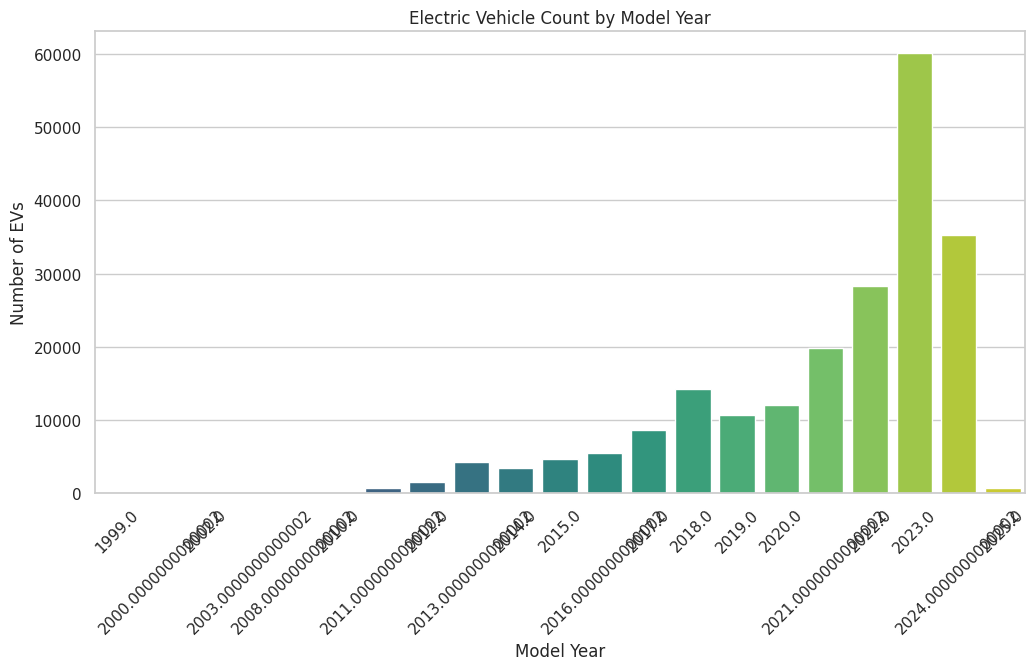

In [ ]:
tt = plotingmodel['Model Year'].value_counts().reset_index()
tt.columns = ['Model Year', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=tt, x='Model Year', y='Count', palette='viridis')
plt.title('Electric Vehicle Count by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)
plt.show()

---
---

# **Step 7: Temporal Analysis**

In [ ]:
yearly_growth = yearly_model_counts.groupby('Model Year').sum().reset_index()
yearly_growth['Growth Rate'] = yearly_growth['Count'].pct_change() * 100

for index, row in yearly_growth.iterrows():
    print(f"Year: {int(row['Model Year'])}, Total Count: {row['Count']}, Growth Rate: {row['Growth Rate']:.2f}%")


Year: 1999, Total Count: 2, Growth Rate: nan%
Year: 2000, Total Count: 7, Growth Rate: 250.00%
Year: 2002, Total Count: 2, Growth Rate: -71.43%
Year: 2003, Total Count: 1, Growth Rate: -50.00%
Year: 2008, Total Count: 22, Growth Rate: 2100.00%
Year: 2010, Total Count: 24, Growth Rate: 9.09%
Year: 2011, Total Count: 704, Growth Rate: 2833.33%
Year: 2012, Total Count: 1549, Growth Rate: 120.03%
Year: 2013, Total Count: 4307, Growth Rate: 178.05%
Year: 2014, Total Count: 3457, Growth Rate: -19.74%
Year: 2015, Total Count: 4722, Growth Rate: 36.59%
Year: 2016, Total Count: 5452, Growth Rate: 15.46%
Year: 2017, Total Count: 8593, Growth Rate: 57.61%
Year: 2018, Total Count: 14295, Growth Rate: 66.36%
Year: 2019, Total Count: 10754, Growth Rate: -24.77%
Year: 2020, Total Count: 12135, Growth Rate: 12.84%
Year: 2021, Total Count: 19813, Growth Rate: 63.27%
Year: 2022, Total Count: 28258, Growth Rate: 42.62%
Year: 2023, Total Count: 60071, Growth Rate: 112.58%
Year: 2024, Total Count: 35237, G

The growth rate is measured by comparing the current year's count to the previous year's count, expressed as a percentage. Negative growth rates indicate a decline in sales.

**(1999-2002)**
* 999: The EV count is very low with only 2 units.
* 2000: A significant increase to 7 units represents a growth rate of 250%, but still very few vehicles were on the road.
* 2002: The count drops back down to 2 units, resulting in a drastic negative growth rate of -71.43%. This indicates instability in the market or possibly the discontinuation of certain models.

**(2003-2012)**
* 2003: A slight decline continues with only 1 unit sold, reflecting a market that hasn’t yet matured.
* 2008: A dramatic rise to 22 units shows a resurgence in interest, potentially driven by increasing environmental awareness and government incentives, resulting in a growth rate of 2100%.
* 2010-2012: Growth remains strong, peaking in 2011 with 704 units, reflecting an increasing consumer shift towards EVs. The growth rate of 2833.33% in 2011 indicates an exponential increase as more models enter the market.

**2013-2016**
* 2013: The highest total count (4307) is reached, but growth slows down in 2014 to 3457 units, resulting in a negative growth rate of -19.74%. This could indicate market saturation or competition from alternative fuel vehicles.
* 2015-2016: A recovery occurs with modest growth rates, reflecting a steady increase in consumer acceptance and advancements in EV technology.

**(2017-2025)**
* 2017-2019: Rapid growth resumes, with counts exceeding 14,000 in 2018. However, the drop in 2019 to 10754 units yields a negative growth rate of -24.77%. This could be due to factors like supply chain issues, market saturation, or economic conditions.
* 2020-2022: The EV market rebounds post-pandemic with significant growth, reaching a total count of 28258 in 2022, showing robust consumer demand and continued expansion of infrastructure.
* 2023: A peak is reached at 60071 units, resulting in a growth rate of 112.58%, likely driven by increasing awareness, incentives, and model availability.
* 2024-2025: A sharp decline occurs, dropping to 35237 units and further down to 760 units in 2025, reflecting a massive negative growth rate of -97.84%

---
*Here are some Plots for the Temporal Analysis*:

Yearly Growth Rate of EV Adoption:

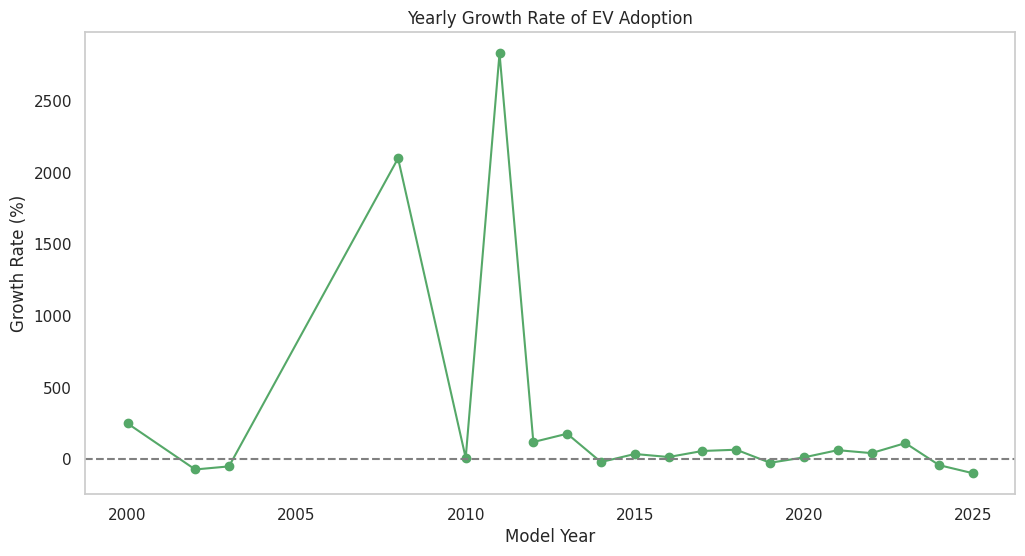

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_growth['Model Year'], yearly_growth['Growth Rate'], marker='o', color='g')
plt.title('Yearly Growth Rate of EV Adoption')
plt.xlabel('Model Year')
plt.ylabel('Growth Rate (%)')
plt.axhline(0, color='gray', linestyle='--')
plt.grid()
plt.show()


Yearly Growth Rate of EV Adoption:

<ipython-input-145-42bd7f8cc47d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_growth, x='Model Year', y='Growth Rate', palette='viridis')


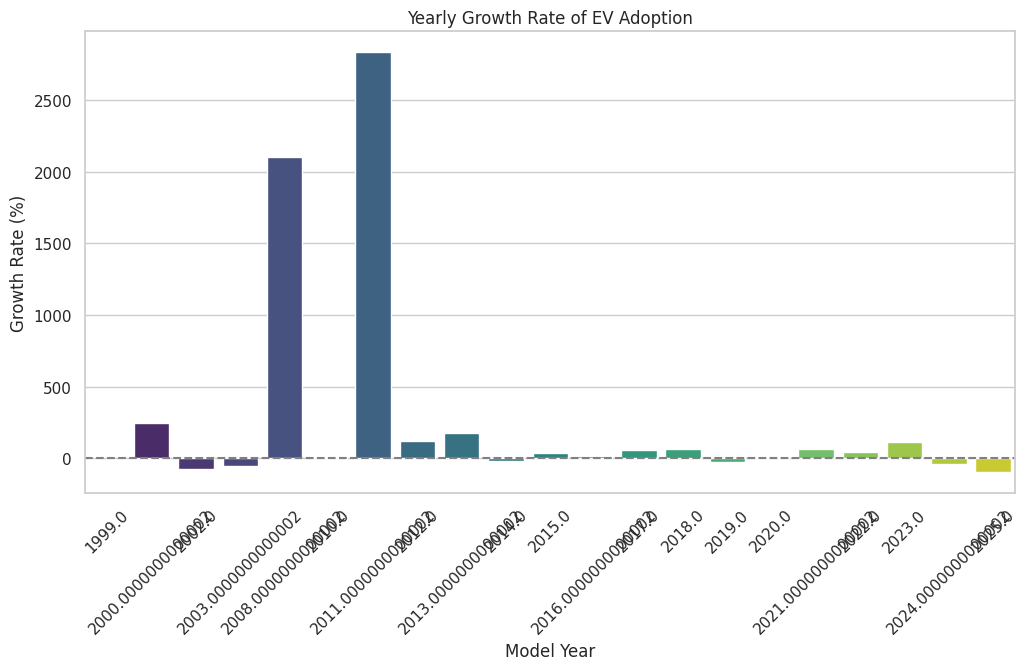

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_growth, x='Model Year', y='Growth Rate', palette='viridis')
plt.title('Yearly Growth Rate of EV Adoption')
plt.xlabel('Model Year')
plt.ylabel('Growth Rate (%)')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.show()
